In [1]:
###Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
###Reading dataset

data = pd.read_csv("C:\\Users\\Himanshu\\Downloads\\problem_1_traveler_raw.csv")
data.head()

,PNR,origination_city,destination_city,orig_city_cd,dest_city_cd,origination_lat,origination_lon,destination_lat,destination_lon,fl_grfare_usd_am,fl_valid_id,fl_mile_ct,fl_cost_per_mile_usd_am,carry_a2_cd,fl_no,seg_arr_local_time,seg_dprt_local_time,seg_arr_utc_time,seg_dprt_utc_time
0,921597,PHX,MIA,PHX,MIA,33.435036,-112.000164,25.796000,-80.278234,550.95,1,1981,0.27,AA,772,5/14/2018 16:33,5/14/2018 9:03,5/14/2018 23:33,5/14/2018 14:03
1,921597,MIA,PUJ,MIA,PUJ,25.796000,-80.278234,18.562477,-68.363998,252.80,1,909,0.27,AA,2593,5/14/2018 21:23,5/14/2018 19:00,5/15/2018 2:23,5/14/2018 23:00
2,921597,PUJ,MIA,PUJ,MIA,18.562477,-68.363998,25.796000,-80.278234,252.81,1,909,0.27,AA,1317,5/18/2018 9:41,5/18/2018 7:00,5/18/2018 13:41,5/18/2018 12:00
3,921597,MIA,PHX,MIA,PHX,25.796000,-80.278234,33.435036,-112.000164,550.95,1,1981,0.27,AA,272,5/18/2018 15:59,5/18/2018 13:55,5/18/2018 20:59,5/18/2018 20:55
4,492751,PHX,SAN,PHX,SAN,33.435036,-112.000164,32.731938,-117.197312,249.44,1,302,0.82,AA,465,2/5/2018 8:52,2/5/2018 8:35,2/5/2018 15:52,2/5/2018 16:35


# Exploring the dataset

In [3]:
print("Shape of the dataset is",data.shape)

Shape of the dataset is (134, 19)


In [4]:
##Null values in the dataset - No null values are present in the data
data.isnull().sum()

PNR                        0
origination_city           0
destination_city           0
orig_city_cd               0
dest_city_cd               0
origination_lat            0
origination_lon            0
destination_lat            0
destination_lon            0
fl_grfare_usd_am           0
fl_valid_id                0
fl_mile_ct                 0
fl_cost_per_mile_usd_am    0
carry_a2_cd                0
fl_no                      0
seg_arr_local_time         0
seg_dprt_local_time        0
seg_arr_utc_time           0
seg_dprt_utc_time          0
dtype: int64

In [5]:
###Data types
data.dtypes

PNR                          int64
origination_city            object
destination_city            object
orig_city_cd                object
dest_city_cd                object
origination_lat            float64
origination_lon            float64
destination_lat            float64
destination_lon            float64
fl_grfare_usd_am           float64
fl_valid_id                  int64
fl_mile_ct                   int64
fl_cost_per_mile_usd_am    float64
carry_a2_cd                 object
fl_no                        int64
seg_arr_local_time          object
seg_dprt_local_time         object
seg_arr_utc_time            object
seg_dprt_utc_time           object
dtype: object

In [6]:
###Valid ID flag
data['fl_valid_id'].unique()

array([1, 0], dtype=int64)

In [7]:
##Count of valid IDs
data['fl_valid_id'].value_counts()

1    82
0    52
Name: fl_valid_id, dtype: int64

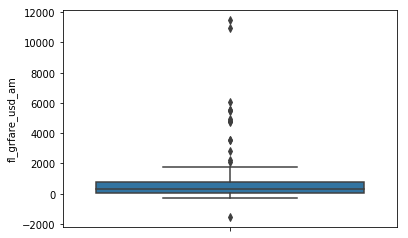

In [8]:
###Plotting Trip Spend
plt.figure(figsize=(6,4))
sns.boxplot( data = data , y = 'fl_grfare_usd_am')
plt.show()

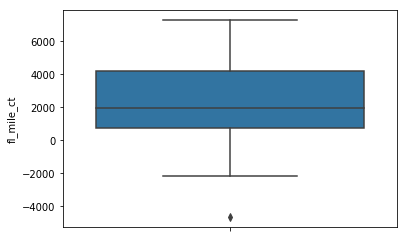

In [9]:
###Plotting Total miles count
plt.figure(figsize=(6,4))
sns.boxplot( data = data , y = 'fl_mile_ct')
plt.show()

In [10]:
###Excluding negative trip spend and negative miles count

data_updated = data[data['fl_grfare_usd_am']>0]

In [11]:
###Selecting relevant columns for analysis
col=['PNR','origination_city','destination_city','fl_grfare_usd_am','fl_valid_id','fl_mile_ct','carry_a2_cd','fl_no','seg_arr_utc_time','seg_dprt_utc_time']
data_new = data_updated[col]

# Total Trip Spend

Assuming "fl_valid_id" corresponds to 1 as valid flight id because in the dataset we found very low trip charges(0,0.06 etc.) for fl_valid_id = 0 for the same combination of flight details as that of fl_valid_id = 1 and hence we will take only those records where fl_valid_id=1

In [12]:
total_trip_spend= data_new[data_new['fl_valid_id']==1]["fl_grfare_usd_am"].sum().round(1)
print("Total spend on trip is: ", total_trip_spend)

Total spend on trip is:  119949.8


# Total Mile Count

In [13]:
total_mile_count= data_new[data_new['fl_valid_id']==1]["fl_mile_ct"].sum().round(1)
print("Total miles count is: ", total_mile_count)

Total miles count is:  171577


# Count of Valid Trips

In [14]:
count_valid_trip = data_new[data_new['fl_valid_id']==1]['fl_valid_id'].sum()
print("Number of Valid Trips: ", count_valid_trip)

Number of Valid Trips:  75


In [15]:
data_new[data_new['fl_valid_id']==1]['origination_city'].unique()

array(['PHX', 'MIA', 'PUJ', 'SAN', 'NAS', 'ATL', 'MEX', 'DEN', 'LON',
       'MAD', 'WAS', 'EWR', 'SFO', 'AMS', 'EDI', 'MSY', 'NBO', 'NYC',
       'EYW', 'BDA', 'SJD', 'LIH', 'LAX', 'DEL', 'SEA', 'MUC', 'NCE',
       'FRA', 'BOS'], dtype=object)

# Distinct Cities Visited

In [16]:
origin = list(data_new[data_new['fl_valid_id']==1]['origination_city'].unique())
destination = list(data_new[data_new['fl_valid_id']==1]['destination_city'].unique())
total = set(origin + destination)

In [17]:
print("Total Cities visited by traveller : ", len(total))
print("Total Cities visited by traveller excluding home city: ", len(total)-1)

Total Cities visited by traveller :  29
Total Cities visited by traveller excluding home city:  28


# Home City Code

Home city should have the maximum number of departures and arrivals

In [18]:
##Assuming fl_valid_id corresponds to 1 as valid flight id

data_new[data_new['fl_valid_id']==1]["origination_city"].value_counts().head(3)

PHX    21
EWR     9
LON     9
Name: origination_city, dtype: int64

In [19]:
##Assuming fl_valid_id corresponds to 1 as valid flight id

data_new[data_new['fl_valid_id']==1]["destination_city"].value_counts().head(3)

PHX    24
LON    10
EWR     6
Name: destination_city, dtype: int64

Based on above calculation we can infer that "PHX" is home city code of the traveller.

# Infer the trip type on the basis of Home City

In [20]:
#Taking only valid trips
data_new_valid= data_new[data_new['fl_valid_id']==1]

In [21]:
## Keeping time format uniform across all rows
data_new_valid['seg_dprt_utc_time'] = pd.to_datetime(data_new_valid['seg_dprt_utc_time'])
data_new_valid['seg_arr_utc_time'] = pd.to_datetime(data_new_valid['seg_arr_utc_time'])

In [22]:
#Grouping all PNR numbers with maximum arrival time and minimum departure time
intermediate_df = data_new_valid.groupby('PNR').agg({'seg_dprt_utc_time':'min', 'seg_arr_utc_time':'max'}).reset_index()
intermediate_df.rename(columns = {'seg_dprt_utc_time':'min_depart_time','seg_arr_utc_time':'max_arrive_time'}, inplace = True)

In [23]:
intermediate_df.head()

,PNR,min_depart_time,max_arrive_time
0,111318,2018-08-09 21:20:00,2018-08-14 08:12:00
1,252241,2018-03-30 02:55:00,2018-03-30 03:36:00
2,276662,2018-11-05 14:50:00,2018-11-13 03:58:00
3,279194,2018-03-05 22:50:00,2018-03-09 01:47:00
4,295064,2018-10-10 21:45:00,2018-10-10 17:35:00


In [24]:
##Creating dictionaries to map it with PNR and extract max arrival time and min departure time for each trip
dic_max = dict(zip(intermediate_df['PNR'],intermediate_df['max_arrive_time']))
dic_min = dict(zip(intermediate_df['PNR'],intermediate_df['min_depart_time']))

data_new_valid['max_arrive_time'] = data_new_valid['PNR'].map(dic_max)
data_new_valid['min_depart_time'] = data_new_valid['PNR'].map(dic_min)

In [25]:
##creating two different dataframes on the basis of arrival and departure
df1 = data_new_valid[data_new_valid['seg_arr_utc_time']==data_new_valid['max_arrive_time']]
df2 = data_new_valid[data_new_valid['seg_dprt_utc_time']==data_new_valid['min_depart_time']]

In [26]:
##Concatenate both dataframes and populate trip type as round or single for each PNR
df_final = pd.DataFrame()
df_final = pd.concat([df1[['PNR','destination_city']].reset_index(drop=True),df2[['origination_city']].reset_index(drop=True)], axis = 1)
df_final['Trip_Type'] = np.where(df_final['destination_city']==df_final['origination_city'], 'Round', 'Single')

In [27]:
df_final.head()

,PNR,destination_city,origination_city,Trip_Type
0,921597,PHX,PHX,Round
1,492751,PHX,PHX,Round
2,961754,PHX,PHX,Round
3,995277,PHX,DEN,Single
4,823594,PHX,LON,Single
